<a href="https://colab.research.google.com/github/mauriciodev/spatialgeodesy/blob/main/exercises/spatialgeodesy_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing useful packages

In [1]:
#These are required for georinex because some incompatibilities with newer xarray versions
!pip install xarray==0.12.1 pandas==0.25.3 numpy==1.19.0 georinex 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.7/522.7 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.9/877.9 KB 44.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 893.2/893.2 KB 40.8 MB/s eta 0:00:00
  Created wheel for georinex: filename=georinex-1.16.1-py3-none-any.whl size=43917 sha256=1c7bd7c4f24cbc9ad7e354fa35b47d0ad9e25ee993fc072ee06b2fd28a044f82
  Stored in directory: /root/.cache/pip/wheels/9d/c1/98/bb2d8ce041d84ca7517d776d2007a56b0671151ce076c54ee5
Successfully built 

# Dependencies

In [2]:
#Python standard libraries
import os #File path operations.
import shutil #Shell operations. Unzipping, moving files, etc.
import urllib.request #Downloader.

#External libraries
import numpy as np #Numeric Python.
import erfa #Essential Routines for Fundamental Astronomy.
import pandas as pd #Python Data Analysis Library.
import matplotlib.pyplot as plt #Plots.
import georinex #RINEX files reader.
import xarray as xa #Multi dimension arrays. For georinex.


/usr/local/lib/python3.8/dist-packages/xarray/core/merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


# Examples

## Downloading a file

In [3]:
link="https://geoftp.ibge.gov.br/informacoes_sobre_posicionamento_geodesico/rbmc/dados/2022/001/onrj0011.zip" #link to the file to be downloaded
zipFile=link.split("/")[-1] #name that will be used to save the file on the local drive
local_filename, headers = urllib.request.urlretrieve(link, zipFile) #download the file saving as the name in zipFile
shutil.unpack_archive(local_filename) #extrating files from the zip file
os.listdir() #list current directory

['.config',
 'onrj0011.22n',
 'onrj0011.zip',
 'onrj0011.22g',
 'onrj0011.22d',
 'sample_data']

## Opening the RINEX file with GeoRinex

In [4]:
#we are using rinex 2 because georinex is incredibly slow for rinex 3 currently.
obsFile="onrj0011.22d" #Observation RINEX file that we downloaded on the previous section. It's a multi GNSS file!
obsData=georinex.load(obsFile,use='G')
obsData
     


<xarray.Dataset>
Dimensions:  (sv: 31, time: 5760)
Coordinates:
  * sv       (sv) object 'G01' 'G02' 'G03' 'G04' ... 'G29' 'G30' 'G31' 'G32'
  * time     (time) object 2022-01-01 ... 2022-01-01T23:59:45
Data variables:
    L1       (time, sv) float64 1.127e+08 nan 1.078e+08 ... nan 1.329e+08 nan
    L2       (time, sv) float64 8.783e+07 nan 8.403e+07 ... nan 1.036e+08 nan
    L5       (time, sv) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    C1       (time, sv) float64 2.145e+07 nan 2.052e+07 ... nan 2.529e+07 nan
    P1       (time, sv) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    C2       (time, sv) float64 2.145e+07 nan 2.052e+07 ... nan 2.529e+07 nan
    P2       (time, sv) float64 2.145e+07 nan 2.052e+07 ... nan 2.529e+07 nan
    C5       (time, sv) float64 nan nan nan nan nan nan ... nan nan nan nan nan
    S1       (time, sv) float64 47.6 nan 52.3 48.8 nan ... nan nan nan 31.6 nan
    S2       (time, sv) float64 48.4 nan 52.1 48.6 nan ... nan nan nan 

## Acessing the pseudorange of a SV

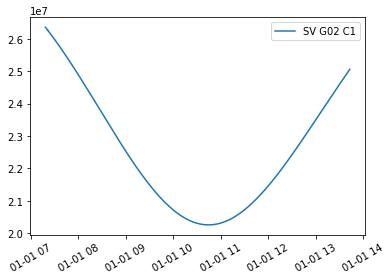

In [22]:
y=obsData.sel(sv='G02') #Selects only the data for that spatial vehicle (SV)
plt.plot(y.time,y.C1, label='SV G02 C1') #y.time is the sequence of timestamps. y.C1 represents the selected pseudorange (GPS band 1 pseudorange). 
plt.xticks(rotation=30) #Rotate the labels on xaxis
plt.legend() #Add a legend
plt.show() #Plot

## Reading a navigation file

In [17]:
#we are using rinex 2 because georinex is incredibly slow for rinex 3 currently.
navFile="onrj0011.22n" #Navigation RINEX file that we downloaded on the previous section.!
navData=georinex.load(navFile)
navData

<xarray.Dataset>
Dimensions:           (sv: 32, time: 31)
Coordinates:
  * time              (time) datetime64[ns] 2022-01-01 ... 2022-01-01T23:59:44
  * sv                (sv) <U3 'G01' 'G02' 'G03' 'G04' ... 'G30' 'G31' 'G32'
Data variables:
    SVclockBias       (time, sv) float64 0.0004691 -0.0006474 ... -4.397e-05
    SVclockDrift      (time, sv) float64 -1e-11 -1.137e-12 ... -5.798e-12
    SVclockDriftRate  (time, sv) float64 0.0 0.0 0.0 0.0 0.0 ... nan nan 0.0 0.0
    IODE              (time, sv) float64 39.0 41.0 38.0 222.0 ... nan 15.0 57.0
    Crs               (time, sv) float64 -141.1 -142.7 -59.75 ... -25.53 18.16
    DeltaN            (time, sv) float64 3.988e-09 4.556e-09 ... 4.741e-09
    M0                (time, sv) float64 -0.6243 -0.4532 -1.795 ... -1.698 2.335
    Cuc               (time, sv) float64 -7.363e-06 -7.488e-06 ... 1.051e-06
    Eccentricity      (time, sv) float64 0.01122 0.02064 ... 0.01047 0.005357
    Cus               (time, sv) float64 4.696e-06 4.23